<a href="https://colab.research.google.com/github/deepak121993/Books/blob/master/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [3]:
# https://keras.io/
import datetime
!pip install -q keras
import keras
print(datetime.datetime.now())

2019-06-23 07:03:00.631316


In [4]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-23 07:03:04.558235


### Load pre-shuffled MNIST data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 0s 0us/step
2019-06-23 07:03:12.576683


(60000, 28, 28)
2019-06-23 07:03:12.688559


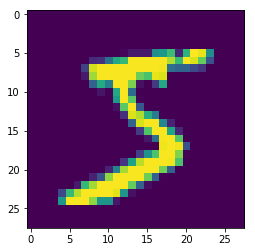

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-23 07:03:12.838656


In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-23 07:03:14.736483


In [9]:
y_train[:10]
print(datetime.datetime.now())

2019-06-23 07:03:16.365382


In [10]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-23 07:03:17.251595


In [11]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-23 07:03:18.844479


In [18]:
## MAIN BLOCK

from keras.layers import Activation,Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
import keras
import tensorflow as tf

input_shape = Input(shape=(28,28,1))

conv1 = Convolution2D(16,(3,3),padding='same')(input_shape)   ## 28 
conv1 = BatchNormalization()(conv1)
conv1 = Activation('relu')(conv1)
conv1 = Dropout(0.20)(conv1)

#concatenate
conc_1 = concatenate([conv1,input_shape])

## 2 convolution
conv2 = Convolution2D(32,(3,3),padding='same')(conc_1)   ## 28  
conv2 = BatchNormalization()(conv2)
conv2 = Activation('relu')(conv2)
conv2 = Dropout(0.20)(conv2)

#concatenate
conc_2  = concatenate([conv1,input_shape,conv2])

##maxpool
max_pool_1 = MaxPooling2D(pool_size=(2, 2))(conc_2)   ##14

## 3 convolution
conv3 = Convolution2D(32,(3,3),padding='same')(max_pool_1)   ## 14
conv3 = BatchNormalization()(conv3)
conv3 = Activation('relu')(conv3)
conv3 = Dropout(0.20)(conv3)

#conactenate
conc_3  = concatenate([max_pool_1,conv3])

## 4 convolution
conv4 = Convolution2D(32,(3,3),padding='same')(conc_3)   ## 14 
conv4 = BatchNormalization()(conv4)
conv4 = Activation('relu')(conv4)
conv4 = Dropout(0.20)(conv4)

#conactenate
conc_4  = concatenate([max_pool_1,conv3,conv4])

## 5 convolution
conv5 = Convolution2D(32,(3,3),padding='same')(conc_4)   ## 14
conv5 = BatchNormalization()(conv5)
conv5 = Activation('relu')(conv5)
conv5 = Dropout(0.20)(conv5)

##concat
conc_5  = concatenate([conv5,conv3,conv4])

##maxpool
max_pool_2 = MaxPooling2D(pool_size=(2, 2))(conc_5)   ##7

## 6 convolution
conv6 = Convolution2D(32,(3,3),padding='same')(max_pool_2)   ## 7
conv6 = BatchNormalization()(conv6)
conv6 = Activation('relu')(conv6)
conv6 = Dropout(0.20)(conv6)

##concat
conc_6  = concatenate([conv6,max_pool_2])  ##7

##7 conv
conv7 = Convolution2D(32,(3,3),padding='same')(conc_6)   ## 7
conv7 = BatchNormalization()(conv7)
conv7 = Activation('relu')(conv7)
conv7 = Dropout(0.20)(conv7)

##concat
conc_7  = concatenate([conv6,max_pool_2,conv7])  ##7

##8 conv
conv8 = Convolution2D(32,(3,3),padding='same')(conc_7)   ## 7
conv8 = BatchNormalization()(conv8)
conv8 = Activation('relu')(conv8)
conv8 = Dropout(0.20)(conv8)

last_conv = Convolution2D(10,7)(conv8)

 
flat=Flatten()(last_conv)
act = Activation('softmax')(flat)

model = keras.models.Model(inputs=[input_shape], outputs=act)

print(datetime.datetime.now())

2019-06-23 07:23:32.548718


In [19]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 28, 28, 16)   160         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 28, 28, 16)   64          conv2d_11[0][0]                  
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 28, 28, 16)   0           batch_normalization_9[0][0]      
__________________________________________________________________________________________________
dropout_9 

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-23 07:23:39.084340


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0623 07:23:42.887084 140606510688128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 30s 493us/step - loss: 0.1083 - acc: 0.9660
Epoch 2/10
34592/60000 [================>.............] - ETA: 10s - loss: 0.0497 - acc: 0.9850

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

In [0]:
print(score)
print(datetime.datetime.now())